In [16]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
import requests
from tqdm import tqdm

import chromedriver_autoinstaller as chromedriver
chromedriver.install()

from selenium.webdriver.common.by import By

CHROME >= 115, using mac-arm64 as architecture identifier


In [3]:
driver = webdriver.Chrome()

driver.get('https://jobs.dou.ua/vacancies/?category=Data+Science')

In [4]:
while True:
    try:
        driver.find_element(By.CSS_SELECTOR, 'div.more-btn a').click()
        time.sleep(3)
    except Exception as ex:
        print(ex)
        print('End.')
        break

Message: element not interactable
  (Session info: chrome=128.0.6613.138)
Stacktrace:
0   chromedriver                        0x000000010222b338 chromedriver + 5096248
1   chromedriver                        0x0000000102222b6a chromedriver + 5061482
2   chromedriver                        0x0000000101dade01 chromedriver + 388609
3   chromedriver                        0x0000000101dfba85 chromedriver + 707205
4   chromedriver                        0x0000000101def8c6 chromedriver + 657606
5   chromedriver                        0x0000000101e1eef2 chromedriver + 851698
6   chromedriver                        0x0000000101def288 chromedriver + 656008
7   chromedriver                        0x0000000101e1f0ae chromedriver + 852142
8   chromedriver                        0x0000000101e3c250 chromedriver + 971344
9   chromedriver                        0x0000000101e1ec93 chromedriver + 851091
10  chromedriver                        0x0000000101dedc79 chromedriver + 650361
11  chromedriver     

In [6]:
content = driver.page_source
soup = BeautifulSoup(content)

In [9]:
vac_list = soup.findAll('a',href=True, attrs={'class':'vt'})
project_href = [i['href'] for i in vac_list]

In [18]:
project_href

['https://jobs.dou.ua/companies/hiretop/vacancies/281076/',
 'https://jobs.dou.ua/companies/airadvisor/vacancies/280848/',
 'https://jobs.dou.ua/companies/softserve/vacancies/258163/',
 'https://jobs.dou.ua/companies/quantum/vacancies/230245/',
 'https://jobs.dou.ua/companies/mobidev/vacancies/280611/',
 'https://jobs.dou.ua/companies/globallogic/vacancies/280563/',
 'https://jobs.dou.ua/companies/airslate/vacancies/276180/',
 'https://jobs.dou.ua/companies/pharmbills/vacancies/270413/',
 'https://jobs.dou.ua/companies/dataroot/vacancies/277299/',
 'https://jobs.dou.ua/companies/modus-x/vacancies/276687/',
 'https://jobs.dou.ua/companies/pin-up-global/vacancies/280355/',
 'https://jobs.dou.ua/companies/privatbank/vacancies/276651/',
 'https://jobs.dou.ua/companies/quantum/vacancies/254781/',
 'https://jobs.dou.ua/companies/data-science-ua/vacancies/280255/',
 'https://jobs.dou.ua/companies/appflame/vacancies/269995/',
 'https://jobs.dou.ua/companies/united-tech/vacancies/280218/',
 'ht

In [19]:
headers={"User-Agent": "HTTPie/3.1.0"}

In [20]:
vacs = {
    'link': [],
    'name': [],
    'desc': []
}
for link in tqdm(project_href):
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    vacs['link'].append(link)
    vacs['name'].append(soup.title.text)
    vacs['desc'].append(soup.select('div.vacancy-section')[0].text)
    time.sleep(1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [01:05<00:00,  1.28s/it]


In [21]:
len(vacs['link'])

51

In [22]:
df = pd.DataFrame(vacs)

In [23]:
df.head()

,link,name,desc
0,https://jobs.dou.ua/companies/hiretop/vacancie...,Data Scientist (NLP & Large Language Models) в...,\nFull time RemoteBecause of inner security po...
1,https://jobs.dou.ua/companies/airadvisor/vacan...,"Data Analyst в AirAdvisor, віддалено | DOU",\nAirAdvisor is a flight compensation company ...
2,https://jobs.dou.ua/companies/softserve/vacanc...,Data Scientist (Generative AI); ID 90049 в Sof...,\nПРО НАС: SoftServe — це провідна ІТ-компанія...
3,https://jobs.dou.ua/companies/quantum/vacancie...,Data Science Engineer (CV expertise) в Quantum...,\nQuantum is a global technology partner deliv...
4,https://jobs.dou.ua/companies/mobidev/vacancie...,"Data Science Engineer в MobiDev, Чернівці, Лод...",\nWe are inviting a passionate Data Science En...


In [24]:
print(df.desc.loc[1])


AirAdvisor is a flight compensation company that seeks to provide compensation to clients whohave experienced a flight delay, missed a flight due to a delay or some other airline fault, or hada flight canceled entirely. AirAdvisor has more than 300,000 customers already trust us frommore than 58 countries. AirAdvisor is a young yet small team eager to grow and encouragepersonnel to grow with the company.
We are looking for a Data Analyst to strengthen our team for a full time and full remote position.
Requirements:2+ years of experience in Data Analytics and Big Data technologiesExperience with Tableau or other BI tools (Power BI, Qlik Sense)Familiarity with Google Cloud (platform), BigQuery (queries), Looker (reports)Practical experience with SQL and various data sources (noSQL, vector databases, column-oriented databases, etc.)Practical experience with Python (Pandas, Numpy, and other data-related libraries)Proficiency in Excel/Google SheetsUnderstanding of key product and marketing

## Visualization

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [27]:
df = pd.read_csv('data_science_vacs.csv')

In [7]:
stopwords_ua = pd.read_csv("stopwords_ua.txt", header=None, names=['stopwords'])
stopwords_ua = list(stopwords_ua.stopwords)

In [19]:
stopwords_list = stopwords_ua + stopwords.words('english')

In [31]:
text = '\n'.join(df.desc.tolist())

In [33]:
len(text)

147544

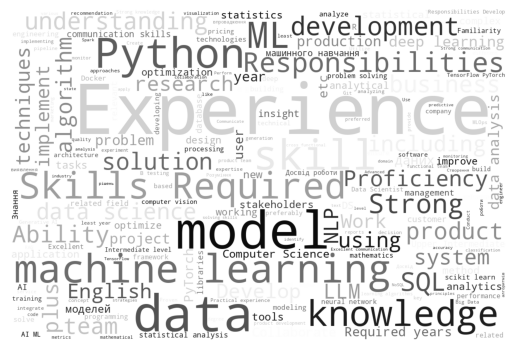

In [50]:
def create_wordcloud(text, stopwords_list):
    wc = WordCloud(
        background_color='white', 
        colormap = 'binary', 
        stopwords = stopwords_list, 
        width = 1200, 
        height = 800).generate(text)
    plt.axis("off")
    plt.imshow(wc)

create_wordcloud(text, stopwords_list)

**Not bad but it can definitely be improved. The current word cloud partially reflects important concepts relevant to a Data Scientist, such as "Python," "machine learning," "NLP," "data," "model," "experience," and "team." It gives a general sense of what appears in the job descriptions, but it does not provide a focused view of the actual skills required.**

## Extract skills

In [35]:
from openai import OpenAI
import json
import os

creds = json.load(open('chatgpt_4_openai_creds.json'))
os.environ['OPENAI_API_KEY'] = creds['OPENAI_API_KEY']
client = OpenAI()

In [36]:
creds.keys()

dict_keys(['OPENAI_API_KEY', 'OPENAI_CHAT_MODEL_NAME'])

```
{
    "OPENAI_API_KEY": "....",
    "OPENAI_CHAT_MODEL_NAME": "gpt-4o-mini"
}
```

In [37]:
openai_model_used = 'gpt-4o-mini'
max_tokens = 4096

def generate_messages(system_content, user_content):
    return [
        {
            "role": "system",
            "content": system_content            
        },
        {
            "role": "user",
            "content":  user_content
        }
    ]

def get_openai_response(messages, temperature=0, max_tokens=max_tokens, top_p=1):
    client = OpenAI()
    return client.chat.completions.create(
        model=openai_model_used,
        messages=messages,
        temperature=temperature,
        # max_tokens=max_tokens,
        top_p=top_p
    )

In [38]:
print(df.desc.loc[0])


What you will do● Become an expert on TransVoyant CDI™ Platform solutions and how they solve pressing customer challenges within Supply Chain and related arenas;● Identify, retrieve, manipulate, relate, and exploit multiple TransVoyant structured and unstructured data sets from thousands of various sources (ex. tweets, live aircraft, forecast weather), including building or generating new data sets as appropriate;● Create methods, models, and algorithms to understand the meaning of streaming live data, translating it into insightful predictive output for customer applications and data products;● Educate internal staff (ex. development, sales, marketing) on how data science and resulting predictions can be productized for key industry verticals;● Keep up to date on competitive solutions, products and services.Must Haves● 2+ years of cloud-based data parsing and analysis, data manipulation and transformation, and visualization experience;● Programming and scripting experience with Scala

In [40]:
prompt = """
You are provided with a technical vacancy description either in English or in Ukrainian. 
Extract only skills required for a candidate and the responsibilities. Return the extracted part 
as a plain text.
Vacancy:
{}
"""
system_content = ''

In [41]:
generate_messages(system_content, prompt.format(df.desc.loc[0]))

[{'role': 'system', 'content': ''},
 {'role': 'user',
  'content': '\nYou are provided with a technical vacancy description either in English or in Ukrainian. \nExtract only skills required for a candidate and the responsibilities. Return the extracted part \nas a plain text.\nVacancy:\n\nWhat you will do● Become an\xa0expert on\xa0TransVoyant CDI™ Platform solutions and how they solve pressing customer challenges within Supply Chain and related arenas;● Identify, retrieve, manipulate, relate, and exploit multiple TransVoyant structured and unstructured data sets from thousands of\xa0various sources (ex. tweets, live aircraft, forecast weather), including building or\xa0generating new data sets as\xa0appropriate;● Create methods, models, and algorithms to\xa0understand the meaning of\xa0streaming live data, translating it\xa0into insightful predictive output for customer applications and data products;● Educate internal staff (ex. development, sales, marketing) on\xa0how data science a

In [42]:
response = get_openai_response(
    generate_messages(system_content, prompt.format(df.desc.loc[0]))
)

In [43]:
response

ChatCompletion(id='chatcmpl-AAEackqeVU1hmziahxZsxfxLgu02Y', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='**Responsibilities:**\n- Become an expert on TransVoyant CDI™ Platform solutions and how they solve pressing customer challenges within Supply Chain and related arenas.\n- Identify, retrieve, manipulate, relate, and exploit multiple TransVoyant structured and unstructured data sets from various sources (e.g., tweets, live aircraft, forecast weather), including building or generating new data sets as appropriate.\n- Create methods, models, and algorithms to understand the meaning of streaming live data, translating it into insightful predictive output for customer applications and data products.\n- Educate internal staff (e.g., development, sales, marketing) on how data science and resulting predictions can be productized for key industry verticals.\n- Keep up to date on competitive solutions, products, and services.\n\n**Skills

In [44]:
response_text = response.model_dump()['choices'][0]['message']['content']

In [45]:
print(response_text)

**Responsibilities:**
- Become an expert on TransVoyant CDI™ Platform solutions and how they solve pressing customer challenges within Supply Chain and related arenas.
- Identify, retrieve, manipulate, relate, and exploit multiple TransVoyant structured and unstructured data sets from various sources (e.g., tweets, live aircraft, forecast weather), including building or generating new data sets as appropriate.
- Create methods, models, and algorithms to understand the meaning of streaming live data, translating it into insightful predictive output for customer applications and data products.
- Educate internal staff (e.g., development, sales, marketing) on how data science and resulting predictions can be productized for key industry verticals.
- Keep up to date on competitive solutions, products, and services.

**Skills Required:**
- 2+ years of cloud-based data parsing and analysis, data manipulation and transformation, and visualization experience.
- Programming and scripting experi

In [38]:
# process all vacancies

def get_skills(vacancy):
    return get_openai_response(generate_messages(system_content, prompt.format(vacancy)))

df['skills'] = df.desc.apply(get_skills)

In [39]:
df['skills_text'] = df.skills.apply(lambda x: x.model_dump()['choices'][0]['message']['content'])

In [40]:
print(df['desc'].loc[1])


MacPaw is a software company located in Limassol, Kyiv, and Boston that develops and distributes software for macOS and iOS. At MacPaw, we believe that humans and technology can reach their greatest potential together. Today, our products have more than 30 million users worldwide.MacPaw is proud to be Ukrainian. The support and development of Ukraine are significant parts of the company’s culture. MacPaw gathers open-minded people who support each other and aspire to change the world around us.We’re looking for an experienced Product Analyst to join one of our biggest products — Setapp.Setapp is MacPaw’s subscription-based app service for macOS and iOS. It provides access to 240+ Mac and iOS apps for daily tasks covering productivity, lifestyle, web development, Mac maintenance, creativity, writing, education, and personal finance.As a Product Analyst, you will join our Purchase team. The team works closely with user accounts, billing, pricing, purchase, business models, User Flows, a

In [41]:
print(df['skills_text'].loc[1])

**Skills required:**
- 2+ years of hands-on experience in product analytics
- Strong experience with SQL
- Solid understanding of main SaaS metrics and unit economy
- Good knowledge of Tableau or another BI system
- Experience in experiment planning and analysis
- Autonomy and proactivity
- Result-oriented and comfortable with presenting findings to the team
- Knowledge of Python/R (as a plus)
- Experience with SaaS products (as a plus)
- Work experience with web analytics (GA/GTM, understanding how web analytics and web tracking work) (as a plus)
- Experience in building analytics with GDPR compliance (as a plus)

**Responsibilities:**
- Use quantitative methods to find bottlenecks and opportunities, cooperate with the team on storming and validation of hypotheses
- Design and analyze experiments to test hypotheses and build new features
- Work closely with product managers and product team to develop and measure key metrics for user accounts
- Explore and analyze data to provide acti

In [46]:
df.to_csv('data_science_vacs_enriched.csv', index=False)
df = pd.read_csv('data_science_vacs_enriched.csv')

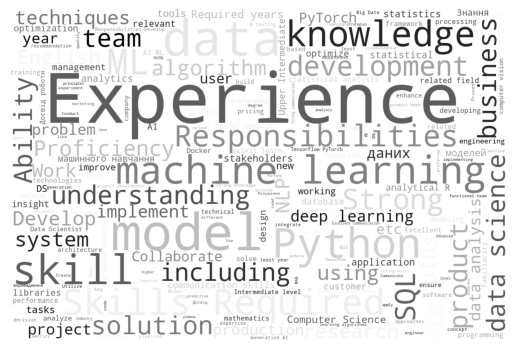

In [20]:
text = '\n'.join(df.skills_text.tolist())
create_wordcloud(text, stopwords_list)

**The WordCloud becomes cleaner and more relevant, but still has limitations. Thus the next step is to switch from simple visualization to structured text analysis.**

## N-grams

In [21]:
import nltk
from nltk import word_tokenize
from nltk.util import bigrams
from collections import Counter
import re

nltk.download('punkt') 

def clean_text(text):
    # Remove non-word characters
    text = re.sub(r'\W+', ' ', text).lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    # Join cleaned tokens back into a string
    return ' '.join(cleaned_tokens)

tokens = word_tokenize(clean_text(text.lower()))  # Tokenize and convert to lower case
bigram_list = list(bigrams(tokens))
bigram_freq = Counter(bigram_list)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiapetrova/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
bigram_freq_d = dict(bigram_freq)

In [23]:
bigram_freq_d = {' '.join(k):v for k, v in bigram_freq_d.items()}

In [24]:
bigram_df = pd.DataFrame(bigram_freq_d.items(), columns=['bigram', 'freq'])

In [25]:
bigram_df.sort_values(by = 'freq', ascending=False)[:30]

,bigram,freq
405,machine learning,54
80,skills required,46
66,data science,29
282,deep learning,21
460,data analysis,21
451,years experience,19
564,computer science,17
339,experience data,15
134,upper intermediate,14
2574,машинного навчання,14


In [26]:
df['contains llm'] = df.desc.str.lower().apply(lambda x: 'llm' in x or 'generative' in x)

In [27]:
df['contains neural'] = df.desc.str.lower().apply(lambda x: 'neural' in x or 'deep' in x)

In [28]:
df.to_csv('data_science_vacs_enriched.csv', index=False)

In [29]:
df['contains llm'].value_counts()

contains llm
False    41
True     16
Name: count, dtype: int64

In [30]:
df['contains neural'].value_counts()

contains neural
False    36
True     21
Name: count, dtype: int64

**The initial raw WordCloud was noisy and dominated by irrelevant words due to descriptive job text. After GPT-based extraction, the WordCloud became more representative of actual skills but still lacked clarity about multi-word concepts essential in Data Science. Introducing N-grams provided a structured, quantitative way to identify the most frequently required skill phrases across job descriptions.**